<a href="https://colab.research.google.com/github/IrisFDTD/AI-UNIZAR-course/blob/main/regression/ai_unizar_course_regression_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<a rel="license" href="http://creativecommons.org/licenses/by-nc-sa/4.0/"><img alt="Licencia Creative Commons" style="border-width:0" src="https://i.creativecommons.org/l/by-nc-sa/4.0/88x31.png" /></a><br /><span xmlns:dct="http://purl.org/dc/terms/" property="dct:title">*Introducción a la inteligencia artificial: redes neuronales avanzadas con Tensorflow-Keras*</span> por <span xmlns:cc="http://creativecommons.org/ns#" property="cc:attributionName">Sergio Gutiérrez Rodrigo (sergut@unizar.es)</span> se distribuye bajo una <a rel="license" href="http://creativecommons.org/licenses/by-nc-sa/4.0/">Licencia Creative Commons Atribución-NoComercial-CompartirIgual 4.0 Internacional</a>.

```
Sergio G Rodrigo
Departamento de Física Aplicada
Universidad de Zaragoza
Instituto de Nanociencia y Materiales de Aragón (INMA)
C/ Pedro Cerbuna, 12, 50009, Zaragoza, España
```






# **Advanced Neural Networks with TensorFlow-Keras**

---
#**Regression with Dense Neural Networks (DNN) (II)**
---
A neural network as a subrogate for the function $y(x)=exp(-x)$, trained in the range $x \in [0,x_{max}]$.

# Main libraries

In [1]:
# Tensorflow Keras and rest of the packages
import tensorflow as tf
print(tf.__version__)
from tensorflow.keras import Model
from tensorflow.keras.layers import Input,Dense
from tensorflow.keras.optimizers import Adam

import numpy as np
import matplotlib.pyplot as plt

2.8.0


# Training data

In [2]:
n_train = 20
xmin = 0
xmax = 4

# Definition of the function domain
x_train=np.linspace(xmin,xmax,n_train)

# The real solution y(x) for training evaluation
y_train=np.exp(-x_train)

# Hyperparameters

In [3]:
# Hiperparameters
epochs = 100
lr=0.001

# Define the model

# (I) Define a standard Keras model

In [4]:
input=Input(shape=(1,))
x=Dense(50, activation='elu')(input)
x=Dense(50, activation='elu')(x)
output = Dense(1,activation=None)(x)
model= Model(input,output)

model.summary()

# Definition of the metrics, optimizer and loss
loss= tf.keras.losses.MeanSquaredError()
metrics= tf.keras.metrics.MeanSquaredError()
optimizer= Adam(learning_rate=lr)

model.compile(loss=loss,
          optimizer=optimizer,
          metrics=[metrics])

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1)]               0         
                                                                 
 dense (Dense)               (None, 50)                100       
                                                                 
 dense_1 (Dense)             (None, 50)                2550      
                                                                 
 dense_2 (Dense)             (None, 1)                 51        
                                                                 
Total params: 2,701
Trainable params: 2,701
Non-trainable params: 0
_________________________________________________________________


In [5]:
history=model.fit(x_train, y_train,batch_size=1,epochs=epochs)

Epoch 1/100
20/20 [==============================] - 1s 3ms/step - loss: 0.1475 - mean_squared_error: 0.1475
Epoch 2/100
20/20 [==============================] - 0s 4ms/step - loss: 0.0898 - mean_squared_error: 0.0898
Epoch 3/100
20/20 [==============================] - 0s 4ms/step - loss: 0.0608 - mean_squared_error: 0.0608
Epoch 4/100
20/20 [==============================] - 0s 3ms/step - loss: 0.0423 - mean_squared_error: 0.0423
Epoch 5/100
20/20 [==============================] - 0s 5ms/step - loss: 0.0324 - mean_squared_error: 0.0324
Epoch 6/100
20/20 [==============================] - 0s 3ms/step - loss: 0.0317 - mean_squared_error: 0.0317
Epoch 7/100
20/20 [==============================] - 0s 6ms/step - loss: 0.0378 - mean_squared_error: 0.0378
Epoch 8/100
20/20 [==============================] - 0s 5ms/step - loss: 0.0255 - mean_squared_error: 0.0255
Epoch 9/100
20/20 [==============================] - 0s 3ms/step - loss: 0.0240 - mean_squared_error: 0.0240
Epoch 10/100
20/20 

# Tensorflow-Keras Model from scratch

In [6]:
class Model_from_scratch(tf.keras.Model):
    def train_step(self, data):
        # Training points and the analytical (exact) solution at this points
        x, y_exact = data
        # Calculate the gradients and update weights and bias
        with tf.GradientTape() as tape:
            y_NN  = self(x, training=True)
            loss=self.compiled_loss(y_exact,y_NN)
        gradients = tape.gradient(loss, self.trainable_variables)
        self.optimizer.apply_gradients(zip(gradients, self.trainable_variables))
        self.compiled_metrics.update_state(y_exact,y_NN) # loss sale 0
        return {m.name: m.result() for m in self.metrics}

# (II) Define a user Keras model

In [7]:
input=Input(shape=(1,))
x=Dense(50, activation='elu')(input)
x=Dense(50, activation='elu')(x)
output = Dense(1,activation=None)(x)
model= Model_from_scratch(input,output)

model.summary()

# Definition of the metrics, optimizer and loss
loss= tf.keras.losses.MeanSquaredError()
metrics= tf.keras.metrics.MeanSquaredError()
optimizer= Adam(learning_rate=lr)

model.compile(loss=loss,
          optimizer=optimizer,
          metrics=[metrics])

Model: "model_from_scratch"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 1)]               0         
                                                                 
 dense_3 (Dense)             (None, 50)                100       
                                                                 
 dense_4 (Dense)             (None, 50)                2550      
                                                                 
 dense_5 (Dense)             (None, 1)                 51        
                                                                 
Total params: 2,701
Trainable params: 2,701
Non-trainable params: 0
_________________________________________________________________


# Run the model

In [8]:
history=model.fit(x_train, y_train,batch_size=1,epochs=epochs,verbose=True)

Epoch 1/100
20/20 [==============================] - 1s 8ms/step - loss: 0.3043 - mean_squared_error: 0.3043
Epoch 2/100
20/20 [==============================] - 0s 8ms/step - loss: 0.0812 - mean_squared_error: 0.0812
Epoch 3/100
20/20 [==============================] - 0s 13ms/step - loss: 0.0528 - mean_squared_error: 0.0528
Epoch 4/100
20/20 [==============================] - 0s 12ms/step - loss: 0.0380 - mean_squared_error: 0.0380
Epoch 5/100
20/20 [==============================] - 0s 17ms/step - loss: 0.0340 - mean_squared_error: 0.0340
Epoch 6/100
20/20 [==============================] - 0s 19ms/step - loss: 0.0284 - mean_squared_error: 0.0284
Epoch 7/100
20/20 [==============================] - 0s 20ms/step - loss: 0.0214 - mean_squared_error: 0.0214
Epoch 8/100
20/20 [==============================] - 1s 31ms/step - loss: 0.0208 - mean_squared_error: 0.0208
Epoch 9/100
20/20 [==============================] - 0s 15ms/step - loss: 0.0190 - mean_squared_error: 0.0190
Epoch 10/100

##  Evolution of losses during training

In [9]:
loss_vs_epochs,metrics_vs_epochs=history.history.keys()
print(loss_vs_epochs,metrics_vs_epochs)
print(history.history[loss_vs_epochs])
print(history.history[metrics_vs_epochs])


loss mean_squared_error
[0.3042530417442322, 0.08117346465587616, 0.05283953994512558, 0.03801941126585007, 0.03398896008729935, 0.02844793163239956, 0.021351711824536324, 0.020809663459658623, 0.019044335931539536, 0.01569351553916931, 0.015827927738428116, 0.01677716337144375, 0.017541538923978806, 0.010779540054500103, 0.013116915710270405, 0.01019199751317501, 0.010883417911827564, 0.008669543080031872, 0.01104495208710432, 0.00749449897557497, 0.0052050151862204075, 0.005691339261829853, 0.004526468459516764, 0.004027245100587606, 0.0029762620106339455, 0.003208250505849719, 0.003582832869142294, 0.0021464242599904537, 0.0019377056742087007, 0.001810163026675582, 0.001797298202291131, 0.0012670871801674366, 0.0014925833093002439, 0.0011997208930552006, 0.0016547881532460451, 0.0033165253698825836, 0.0025189362931996584, 0.001358874375000596, 0.0009790913900360465, 0.000652348913718015, 0.0007272900547832251, 0.0007416018052026629, 0.0008375560864806175, 0.0007715012761764228, 0.00

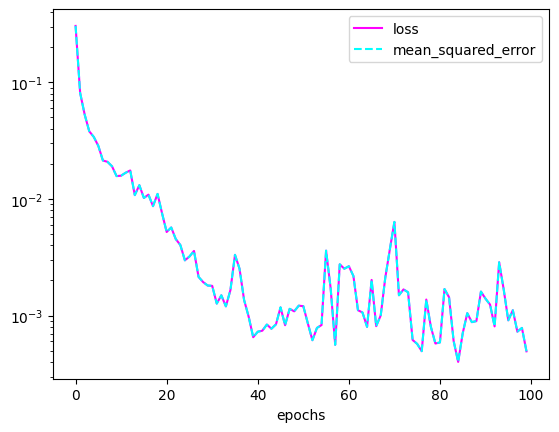

In [10]:
# summarize history for loss and metris
plt.rcParams['figure.dpi'] = 100
plt.plot(history.history[loss_vs_epochs],
         color='magenta',
         label=loss_vs_epochs)
plt.plot(history.history[metrics_vs_epochs],
         color='cyan',
         label=metrics_vs_epochs,linestyle='--')
plt.yscale("log")
plt.xlabel('epochs')
plt.legend(loc='upper right')
plt.show()

# List the methods available for a given class ("package")

In [11]:
# List the methods of a given package
lib=tf.keras.Model
method_list = [method for method in dir(lib) if method.startswith('_') is False]

print("Funciones disponibles en",lib.__name__)
for func in method_list:
  print("Función disponible:",func)

Funciones disponibles en Model
Función disponible: activity_regularizer
Función disponible: add_loss
Función disponible: add_metric
Función disponible: add_update
Función disponible: add_variable
Función disponible: add_weight
Función disponible: apply
Función disponible: build
Función disponible: call
Función disponible: compile
Función disponible: compute_dtype
Función disponible: compute_loss
Función disponible: compute_mask
Función disponible: compute_metrics
Función disponible: compute_output_shape
Función disponible: compute_output_signature
Función disponible: count_params
Función disponible: distribute_strategy
Función disponible: dtype
Función disponible: dtype_policy
Función disponible: dynamic
Función disponible: evaluate
Función disponible: evaluate_generator
Función disponible: finalize_state
Función disponible: fit
Función disponible: fit_generator
Función disponible: from_config
Función disponible: get_config
Función disponible: get_input_at
Función disponible: get_input

# Validation: $y(x)$ vs $y_{NN}(x)$ and its derivatives

## Derivatives with Tensorflow

In [12]:
x=tf.constant(3.0,dtype=tf.float32)
with tf.GradientTape() as tape:
      tape.watch(x)
      y=x**3
dy_dx = tape.gradient(y,x)

print("Tensorflow dy/dx=",dy_dx.numpy())
print("Analitical dy/dx=",3*(x.numpy())**2)

Tensorflow dy/dx= 27.0
Analitical dy/dx= 27.0


## A function to calculate the gradients using a Keras model

In [13]:
def get_gradients(model,x):
  '''
  The gradients y'(x) and y''(x) from the model
  '''
  x = tf.convert_to_tensor(x, dtype=tf.float32)
  with tf.GradientTape() as t:
    t.watch(x)
    with tf.GradientTape() as t2:
          t2.watch(x)
          y = model(x)
    dy_dx = t2.gradient(y,x)
  d2y_dx2 = t.gradient(dy_dx,x)
  return dy_dx,d2y_dx2

## Plot the results

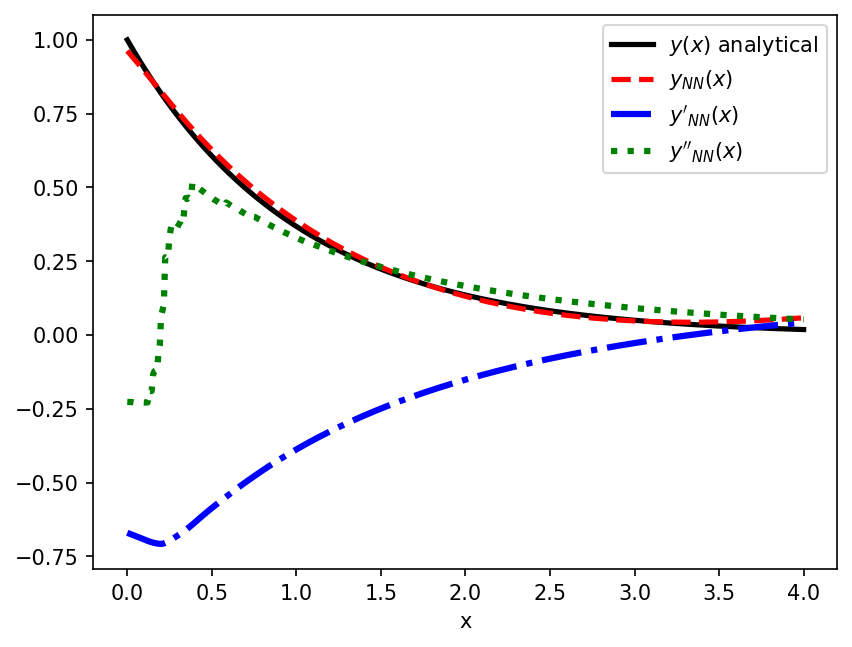

In [14]:
# Check the ODE-NN at different points not included in the training set
n = 500
x=np.linspace(0,4,n)
y_exact=tf.exp(-x)
y_NN=model.predict(x,verbose=0)

dy_dx_NN,d2y_dx2_NN=get_gradients(model,x)

# Plot the results
plt.rcParams['figure.dpi'] = 150
plt.plot(x, y_exact, color="black",linestyle='solid',
                     linewidth=2.5,label="$y(x)$ analytical")
plt.plot(x, y_NN, color="red",linestyle='dashed',
                     linewidth=2.5, label="$y_{NN}(x)$")
plt.plot(x, dy_dx_NN, color="blue",linestyle='-.',
                     linewidth=3.0, label="$y'_{NN}(x)$")
plt.plot(x, d2y_dx2_NN, color="green", linestyle='dotted',
                     linewidth=3.0, label="$y''_{NN}(x)$")
plt.legend()
plt.xlabel("x")
plt.show()